# ***Subset Selection and Prediction using Linear Model for the College dataset of U.S***

>[Subset Selection and Prediction using Linear Model for the College dataset of U.S](#scrollTo=Du0xhMO9udeU)

>[Introduction:](#scrollTo=gX1nrOV0C4Y6)

>[Objective:](#scrollTo=gX1nrOV0C4Y6)

>[Data Dictionary:](#scrollTo=RbbbLOf3EiVo)

>[Exploratory Data Analysis:](#scrollTo=t_CbdOUTHfk5)

>[Data Preprocessing:](#scrollTo=8WCnnfYRINH4)

>[Data Splitting: Training and Testing](#scrollTo=7OK6bzqlK5Tt)

>[Subset Selection and Model Fitting:](#scrollTo=cdX0kc5RPMgu)

>>[Specifiying the predictors and response:](#scrollTo=cdX0kc5RPMgu)

>>[Mean Squared Error:](#scrollTo=s4v9KNyDRb6G)

>>[Forward Selection:](#scrollTo=s4v9KNyDRb6G)

>>[Backward Elimination:](#scrollTo=1U95_5uyTz2x)

>>[Stepwise Regression:](#scrollTo=PZvgV32_W-JP)

>[Cross Validation of the models:](#scrollTo=C5aO9T5ekKyF)

>[Best Subset Selection:](#scrollTo=R7Bu3NwlhLQQ)

>[Conclusions:](#scrollTo=P59Lz3WhnV9Y)



# Introduction:
Subset selection, forward, backward, and stepwise regression are techniques to select the most predictive features, enhancing model simplicity and performance. Subset selection evaluates various feature combinations to find the optimal subset. Forward selection starts with no features, adding the most significant one at each step until no improvement is seen. Backward elimination begins with all features, removing the least significant one at each step. Stepwise regression is a hybrid, allowing features to be added or removed at each step. Cross-validation is a method to assess all such model's performances. Such techniques are approached for better model accuracy and predictions.

# Objective:
Using the College Dataset from the ISLR package in R, a linear model is fitted using subset selection, forward, backward and stepwise regression procedures, along with cross validating the same to get the best one. The aim is to predict the number of applications received using the other variables in the data.


Downloading necessary packages

In [ ]:
#pip install ISLP
#pip install l0bnb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from ISLP.models import ModelSpec as MS
from ISLP.models import (Stepwise ,sklearn_selected ,sklearn_selection_path)
from statsmodels.api import OLS
from l0bnb import fit_path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Dictionary:

The dataset is taken from ISLR package in R: https://rdrr.io/cran/ISLR/

It deals with large number of US Colleges from the 1995 issue of US News and World Report..

The following columns are described as:
> Private- A factor with levels No and Yes indicating private or public university.

> Apps- Number of applications received

> Accept- Number of applications accepted

> Enroll-Number of new students enrolled

> Top10perc-Pct. new students from top 10% of H.S. class

> Top25perc- Pct. new students from top 25% of H.S. class

> F.Undergrad- Number of fulltime undergraduates

> P.Undergrad- Number of parttime undergraduates

> Outstate- Out-of-state tuition

> Room.Board- Room and board costs

> Books- Estimated book costs

> Personal- Estimated personal spending

> PhD- Pct. of faculty with Ph.D.'s

> Terminal- Pct. of faculty with terminal degree

> S.F.Ratio- Student/faculty ratio

> perc.alumni- Pct. alumni who donate

> Expend- Instructional expenditure per student

> Grad.Rate- Graduation rate

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

In [ ]:
college=pd.read_csv('/content/drive/MyDrive/College.csv')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Exploratory Data Analysis:

In [ ]:
college.shape

(777, 18)

In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

The data comprises of 777 observations corresponding to 18 columns. All the
variables are numeric(in cm) with int(or in one case, float) data type except the type of University (whether public or private).

In [ ]:
null_values = college.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


There are no null values in the data


In [ ]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


The mean number of applications is 3001, but there's a large standard deviation (3870), indicating significant variability among colleges. The maximum number of applications received by a college is 48,094, which suggests some colleges are extremely popular or large.

On average, colleges accept 2018 students and enroll about 780, showing a drop-off from acceptance to enrollment, as expected. The variability in these numbers also suggests a wide range of college sizes and selectivity.

The Undergraduate average number counts shows that most students are full-time undergraduates, but there's also a considerable number of part-time undergrads, highlighting the importance of part-time programs at many institutions.

There's a notable difference in the average percentage of students in the top 10% and top 25% of their high school classes, indicating diversity in the academic standing of the student bodies.

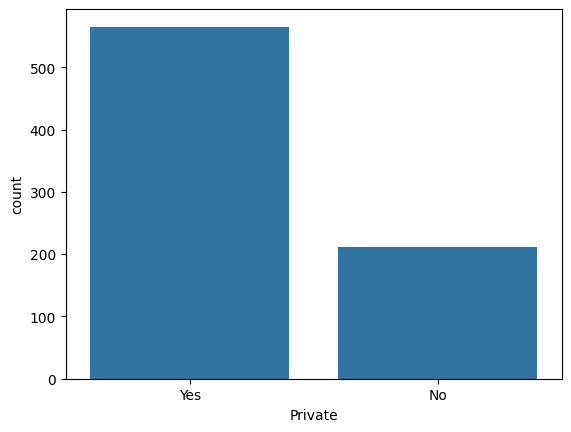

In [ ]:
sns.countplot(x='Private', data=college)
plt.show()

There are more number of private colleges in U.S (more than 2 times) of the number of public colleges.

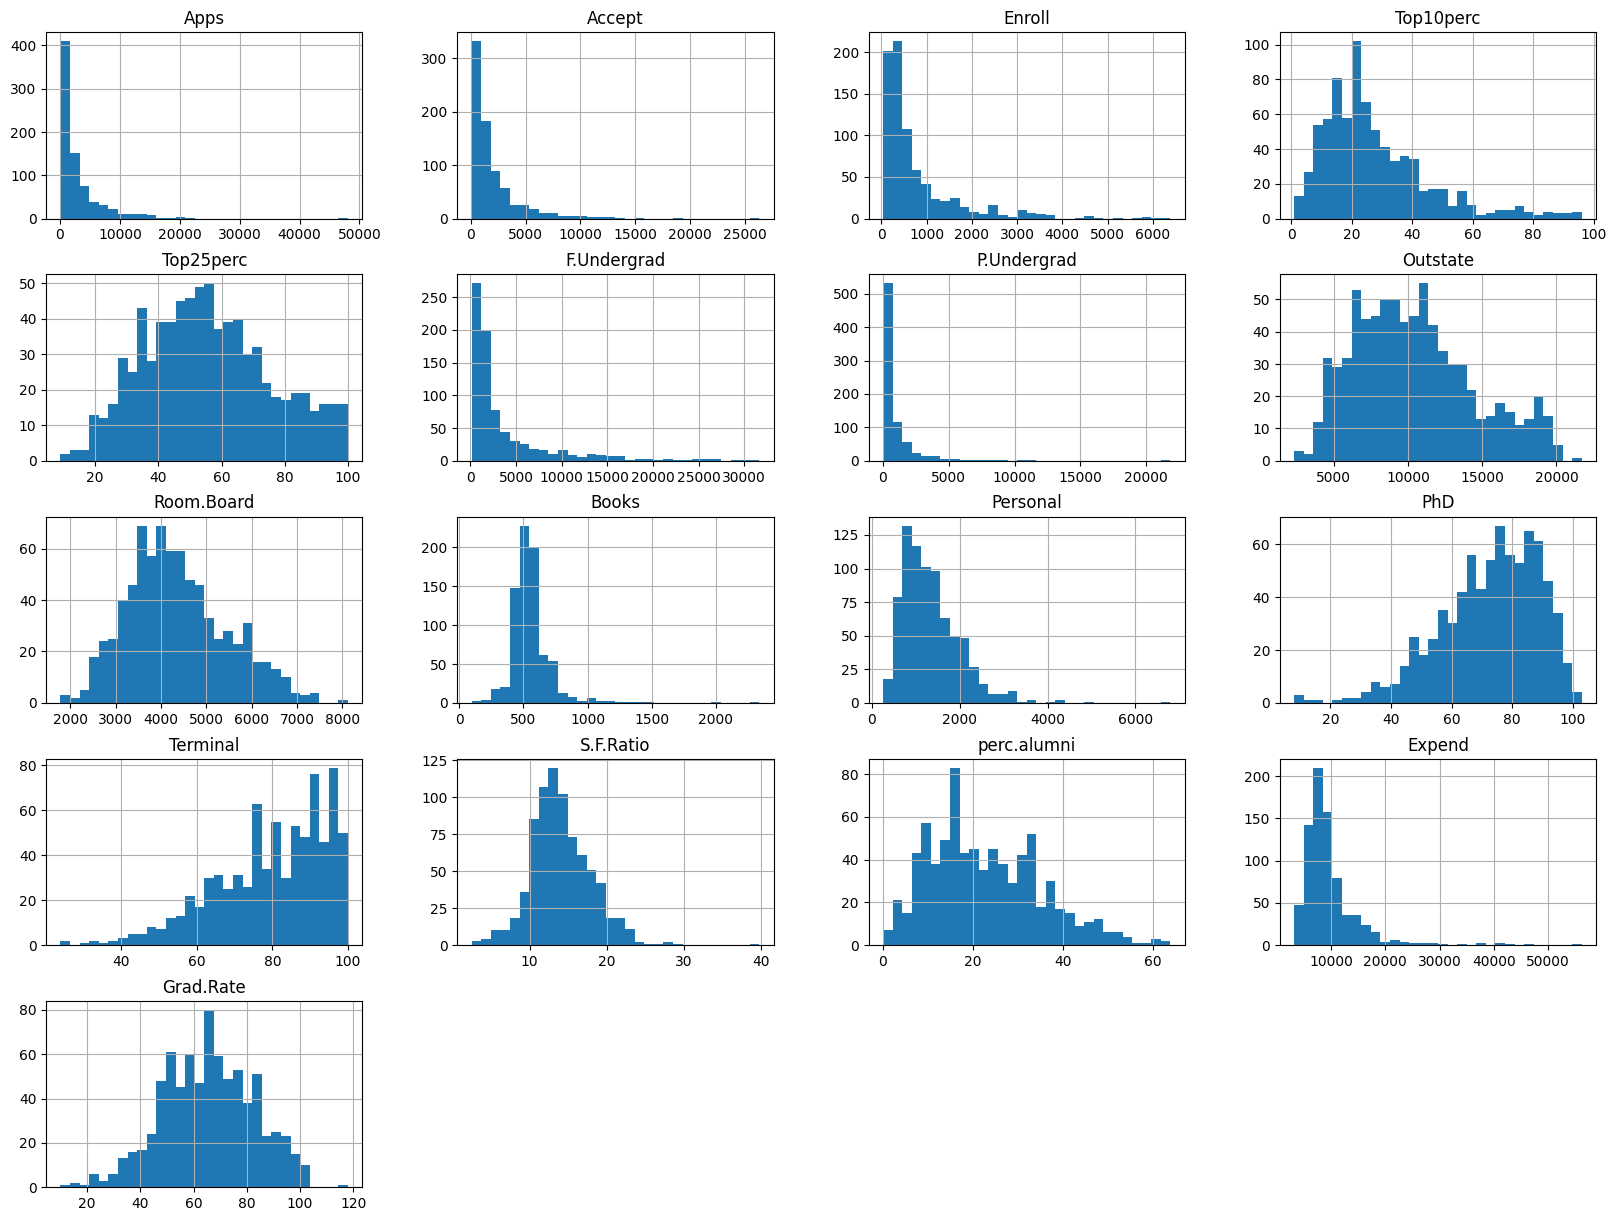

In [ ]:
college.hist(bins=30, figsize=(20, 15))
plt.show()

All the variables show non-normality behaviour in their distribution curve, with data points either skewed positively or negatively.

The distributions are overall unimodal in nature, showing high variability amongst the values.

<ipython-input-57-1dd7b6de5447>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = college.corr()


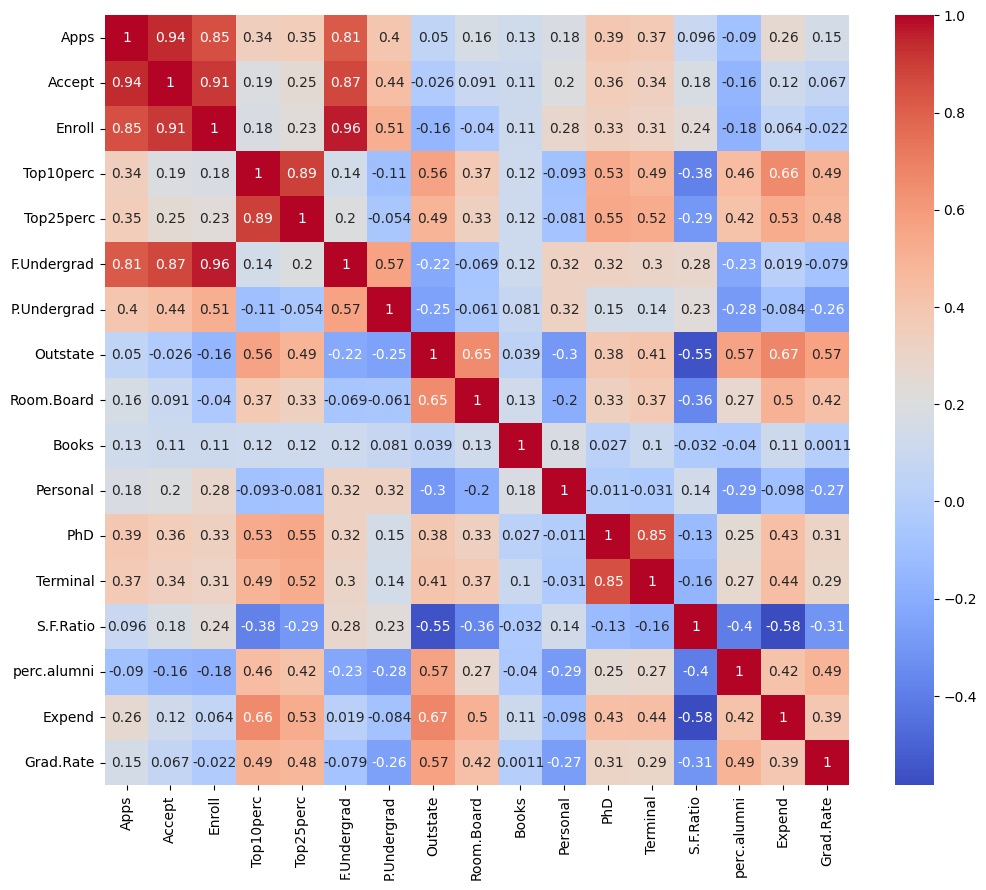

In [ ]:
corr_matrix = college.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Many variables are seemingly correlated or dependent to one another, as can be seen from the matrix.

Number of applications received, accepted and enrolled, possess substantially high correlation of 0.95, which is fairly logical, similarly for top10 and top25 percentiles.

There are other instances of high dependency observed such as PhD with Terminal, application counts with number of undegraduates etc.





# Data Preprocessing:

In [ ]:
college_data = college.replace([np.inf, -np.inf], np.nan)
college_data = college_data.dropna()
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college_data.shape

(777, 18)

To avoid any type of absurd observations like NaN or inf values, we drop all the na values and create a new dataframe. But as there is no such observation, our data remains unchanged.

In [ ]:
college_data["Private"]=college_data["Private"].map({'Yes': 1,'No': 0}).astype(int)
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


As there is only one categorical column here showing the type of Univ, a mapping is done on it to convert it to numerical type.

In [ ]:
numerical_columns = ['Apps', 'Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(college_data[numerical_columns])
college_data1 = pd.DataFrame(scaled_numerical, columns=numerical_columns)

Z-score normalization is being performed here to standardise all the numerical columns.

It assumes that the data follows a distribution that might not necessarily be Gaussian (normal), but is transformed in a way that its distribution will have a mean value 0 and standard deviation of 1.​


# Data Splitting: Training and Testing

Below presents the new data with standardised numerical values and categorical mapping.

In [ ]:
college_data1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [ ]:
X = college_data1.drop('Apps', axis=1)
y = college_data1['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Considering the entire data in use, we have Number of Applications received as the response variable y, and all variables other than it are our predictors, X.

A 80:20 ratio is done to divide the data into the training and testing datasets respectively.

# Subset Selection and Model Fitting:

## Specifiying the predictors and response:

In [ ]:
design = MS(college_data1.columns.drop('Apps')).fit(college_data1)

'design' is initialized with the Model Specification (MS) object by specifying the predictors (independent variables).

## Mean Squared Error:
The Mean Squared Error captures the average squared difference between the estimated values (predictions) and the actual value of the target variable. We will obtain it by fitting each of the three model below, on unseen data(here 20%,testing dataset) and then understand the model performances.

## Forward Selection:

In [ ]:
forward = Stepwise.first_peak(design,direction='forward',max_terms=len(design.terms))
# direction is set to "forward"
# the maximum number of terms is set to the number of available predictors.

The procedure selects the best model by iteratively adding variables that improve the model the most until no significant improvement is made.

In [ ]:
np.asarray(college_data1)

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [ ]:
forward_MSE = sklearn_selected(OLS,forward)
forward_MSE.fit(X_train , y_train)

The model is performed using OLS as the base model and the forward selection strategy. This model is then applied on the training set.

In [ ]:
y_pred1 = forward_MSE.predict(X_test)

The model is then used to predict the values from the testing data.

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print("The Mean Squared Error for Forward Selection Model is",mse1)

The Mean Squared Error for Forward Selection Model is 0.09643741829206892




As the MSE value is very low here,the model is able to predict the target variable with higher accuracy.

## Backward Elimination:

In [ ]:
backward = Stepwise.first_peak(design,direction='backward',max_terms=len(design.terms))
# direction is se to "backward"
# the maximum number of terms is set to the number of available predictors.

Starting with a model that includes all available predictors, the process iteratively removes the least significant predictor until the best subset of predictors is found based on a selection criteria.

In [ ]:
backward_MSE = sklearn_selected(OLS,backward)
backward_MSE.fit(X_train , y_train)

The model is performed using OLS as the base model and the backward elimination  strategy. This model is then applied on the training set.

In [ ]:
y_pred2 = backward_MSE.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print("The Mean Squared Error for Backward Elimination Model is",mse2)

The Mean Squared Error for Backward Elimination Model is 0.8977601669771764


As the MSE value is comparatively high here compared to forward selection, there can be significant deviations of the predicted values of the model from original values.

## Stepwise Regression:


In [ ]:
stepwise = Stepwise.first_peak(design,direction='stepwise',max_terms=len(design.terms))
# direction is se to "stepwise"
# the maximum number of terms is set to the number of available predictors.

This model includes a subset of predictors that are considered most relevant for predicting the target variable. The subset is obtained through an iterative process of adding and removing predictors based on their contribution to the model.

In [ ]:
stepwise_MSE = sklearn_selected(OLS,stepwise)
stepwise_MSE.fit(X_train , y_train)

The model is performed using OLS as the base model and the backward elimination  strategy. This model is then applied on the training set.

In [ ]:
y_pred3 = stepwise_MSE.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
print("The Mean Squared Error for Stepwise Regression Model is",mse2)

The Mean Squared Error for Stepwise Regression Model is 0.8977601669771764


As the MSE value is comparatively high here equal to backward elimination, there can be significant deviations of the predicted values of the model from original values.

# Cross Validation of the models:

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42) # Initiliaze a K-Fold cross-validation strategy with 10 folds

# A function to compute the negative mean squared error for cross-validation
def compute_cv_mse(model, X, y, kf):
    mse_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf) #negative MSE is used because cross_val_score aims to maximize a utility function
    return mse_scores

# Compute cross-validated MSE for each model, forward, backward & stepwise
forward_cv_mse = compute_cv_mse(forward_MSE, X_train, y_train, kf)
backward_cv_mse = compute_cv_mse(backward_MSE, X_train, y_train, kf)
stepwise_cv_mse = compute_cv_mse(stepwise_MSE, X_train, y_train, kf)

Taking 10 folds for Kfold Cross Validation procedure, we create a function for computing mean square errors using Cross Validation on training dataset.

This function is then called for every model created above, to select the best model, having lowest MSE.

In [ ]:
# Determine the best model based on the lowest average MSE
min_mse = min(np.mean(forward_cv_mse), np.mean(backward_cv_mse), np.mean(stepwise_cv_mse))
if min_mse == np.mean(forward_cv_mse):
    print("Forward Selection is the best model based on cross validated MSE: ",np.mean(forward_cv_mse))
elif min_mse == np.mean(backward_cv_mse):
    print("Backward Elimination is the best model based on cross validated MSE: ",np.mean(backward_cv_mse))
else:
    print("Stepwise Regression is the best model based on cross validated MSE: ",np.mean(stepwise_cv_mse))

Forward Selection is the best model based on cross validated MSE:  0.07954918266270192


Forward Selection comes out to be the best model based on cross validated MSE, also we can see there that its mean square error is even less than that obtained by fitting the same model on testing data.

# Best Subset Selection:

In [ ]:
D = design.fit_transform(college_data1)
D = D.drop('intercept', axis=1)
X1 = np.asarray(D)
y_array = y.to_numpy()
path = fit_path(X1,y_array,max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  5
Iteration: 4. Number of non-zeros:  12
Iteration: 5. Number of non-zeros:  16


In [ ]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Accept       777 non-null    float64
 1   Enroll       777 non-null    float64
 2   Top10perc    777 non-null    float64
 3   Top25perc    777 non-null    float64
 4   F.Undergrad  777 non-null    float64
 5   P.Undergrad  777 non-null    float64
 6   Outstate     777 non-null    float64
 7   Room.Board   777 non-null    float64
 8   Books        777 non-null    float64
 9   Personal     777 non-null    float64
 10  PhD          777 non-null    float64
 11  Terminal     777 non-null    float64
 12  S.F.Ratio    777 non-null    float64
 13  perc.alumni  777 non-null    float64
 14  Expend       777 non-null    float64
 15  Grad.Rate    777 non-null    float64
dtypes: float64(16)
memory usage: 97.2 KB


The results illustrate the iterative nature of the feature selection process, where the algorithm progressively explores larger sets of features to determine the optimal subset for the model.

The "number of non-zeros" refers to the features that the algorithm has deemed significant enough to include in the model at each step.

The best model out of all the above 5 combinations, shall be the one having minimum MSE, denoted in these models as M.

In [ ]:
path[0]

{'B': array([0.92494544, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'B0': -1.4171282205486437e-17,
 'lambda_0': 0.4319598000341876,
 'M': 0.9249515412188168,
 'Time_exceeded': False}

In [ ]:
# Initialize variables to track the minimum 'M' value and its corresponding iteration
min_M = float('inf')  # Start with infinity as the initial minimum
best_iteration = None
best_iteration_output = None

# Loop through each iteration's result
for i, iteration_output in enumerate(path):
    # Check if the current iteration has a lower 'M' value
    if iteration_output['M'] < min_M:
        min_M = iteration_output['M']  # Update the minimum 'M' value
        best_iteration = i  # Update the best iteration index
        best_iteration_output = iteration_output  # Update the best iteration output

# Print the best iteration and its 'M' value
print(f"The best iteration is {best_iteration} with an 'M' value of {min_M}.")
print("Best iteration output:", best_iteration_output)

The best iteration is 0 with an 'M' value of 0.9249515412188168.
Best iteration output: {'B': array([0.92494544, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), 'B0': -1.4171282205486437e-17, 'lambda_0': 0.4319598000341876, 'M': 0.9249515412188168, 'Time_exceeded': False}


We breakdown the output as:
'B' array: represents the coefficients assigned to each predictor in model.

'B0': the intercept

'lambda_0': Appears to be a regularization parameter, particularly useful in estimators like Ridge and Lasso

'M': The 'M' value of 0.9249 approx, is a performance metric used to evaluate the model at this iteration.

Since the loop states this is the best iteration based on 'M', it suggests that the model with just the first feature and this 'M' value is the most optimal one.

# Conclusions:

The results highlight our subset selection methods into various techniques including forward, backward, and stepwise selection, aiming to identify the most predictive features for the model. Also by applying the concept of cross-validation, particularly K-Fold cross-validation, we ensured the model's reliability across different data segments, particularly for unseen data like testing. From fitting a linear model with a suitable selection method or performing cross validation on all methods, we see that Forward Selection comes out to be the optimal choice for this data, with only one feature, the first feature. The final model that can be applied for this data be written as:

Predicted_Response= 0.9249454×Feature1 − 1.4171282205e−17 , where feature1 corresponds to the number of applications accepted.